# Mounting Drive & Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from collections import Counter
from gensim.models import Word2Vec
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils import plot_model
import gensim.downloader as api

# Data Preprocessing

In [ ]:
!unrar x /content/drive/MyDrive/Dataset/scoring_dataset.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/scoring_dataset.rar

Creating    scoring dataset                                           OK
Extracting  scoring dataset/all_prompts.csv                                0%  OK 
Extracting  scoring dataset/test.csv                                      20%  OK 
Extracting  scoring dataset/train.csv                                     99%  OK 
All OK


In [ ]:
d = pd.read_csv("/content/scoring dataset/train.csv")
d.head(10)

,Unnamed: 0,promptId,uniqueId,essay,evaluator_rating
0,0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,2,1,1_212,I strongly agree with the statement that tight...,2.0
3,3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,4,1,1_229,i am totally agree with the statement that tig...,3.0
5,5,1,1_226,I am totally disappointed(Not Agree) with our ...,2.0
6,6,1,1_99,the education system is very rough it does not...,3.0
7,7,1,1_240,I agreed with the tightly defined curriculum o...,2.5
8,8,1,1_127,"Now a days, education system is very important...",2.0
9,9,1,1_176,"In the current scenario,education plays a vita...",4.0


In [ ]:
t = pd.read_csv("/content/scoring dataset/train.csv")
t.head(20)

,Unnamed: 0,promptId,uniqueId,essay,evaluator_rating
0,0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,2,1,1_212,I strongly agree with the statement that tight...,2.0
3,3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,4,1,1_229,i am totally agree with the statement that tig...,3.0
5,5,1,1_226,I am totally disappointed(Not Agree) with our ...,2.0
6,6,1,1_99,the education system is very rough it does not...,3.0
7,7,1,1_240,I agreed with the tightly defined curriculum o...,2.5
8,8,1,1_127,"Now a days, education system is very important...",2.0
9,9,1,1_176,"In the current scenario,education plays a vita...",4.0


In [ ]:
t = pd.read_csv("/content/scoring dataset/test.csv")
t.head(20)

,Unnamed: 0,promptId,uniqueId,essay
0,0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1,1_214,"I strongly agree with the statement , The tig..."
2,2,1,1_196,Imagination and creativity is the most importa...
3,3,1,1_178,In our eduction system leaves no room for imag...
4,4,1,1_201,"I will agree at some what extend, because if w..."
5,5,1,1_51,This is the part of our subject since populati...
6,6,1,1_276,Education is very important in everybody life....
7,7,1,1_236,I am disagree to this that the tightly defined...
8,8,1,1_68,The tightly defined curriculum of our educatio...
9,9,1,1_136,NEED FOR IMAGINATION AND CREATIVITY IN CHILDRE...


In [ ]:
p = pd.read_csv("/content/scoring dataset/all_prompts.csv")
p.head(10)

,Unnamed: 0,promptId,prompt_question
0,0,1,The tight curriculum of our education system l...
1,1,2,Our society is disrupted by the ever-widening ...
2,2,3,Has technology become a new addiction? Have we...
3,4,5,"In the nuclear age, the production and develop..."




---



In [ ]:
!pip install -q pandas nltk scikit-learn


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Load your dataset
data = pd.read_csv('/content/scoring dataset/train.csv')

# Data Cleaning
data.drop_duplicates(inplace=True)
data.dropna(subset=['essay'], inplace=True)

# Text Cleaning
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # Tokenization and lowercase
    tokens = nltk.word_tokenize(text.lower())

    # Remove punctuation and stopwords, and lemmatize
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

    return ' '.join(clean_tokens)

data['essay'] = data['essay'].apply(preprocess_text)

# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(data['essay'])

In [ ]:
print(data)

      Unnamed: 0  promptId uniqueId  \
0              0         1    1_323   
1              1         1    1_238   
2              2         1    1_212   
3              3         1    1_117   
4              4         1    1_229   
...          ...       ...      ...   
1235        1235         5    5_419   
1236        1236         5    5_420   
1237        1237         5    5_421   
1238        1238         5    5_422   
1239        1239         5    5_423   

                                                  essay  evaluator_rating  
0     present age education system good many thing d...               3.0  
1     agree tightly defined curriculum education sys...               4.0  
2     strongly agree statement tight schedule educat...               2.0  
3     education system nice quitely disagree change ...               2.0  
4     totally agree statement tightly defined curric...               3.0  
...                                                 ...               ...  

In [ ]:
# Specify the columns to be removed
columns_to_remove = ['Unnamed: 0', 'uniqueId']
data.drop(columns=columns_to_remove, inplace=True)

In [ ]:
print(data)

      promptId                                              essay  \
0            1  present age education system good many thing d...   
1            1  agree tightly defined curriculum education sys...   
2            1  strongly agree statement tight schedule educat...   
3            1  education system nice quitely disagree change ...   
4            1  totally agree statement tightly defined curric...   
...        ...                                                ...   
1235         5  entire world race producing arm weapon nuclear...   
1236         5  race development weapon proceeding day product...   
1237         5  era every second person hope work towards achi...   
1238         5  introduction since beginning time human kind a...   
1239         5  conquer nation first disarm citizen adolf hitl...   

      evaluator_rating  
0                  3.0  
1                  4.0  
2                  2.0  
3                  2.0  
4                  3.0  
...                ..

In [ ]:
# Assuming your DataFrame is named 'data'
entry_counts = data['promptId'].value_counts()


In [ ]:
print(entry_counts)

3    325
5    325
2    317
1    273
Name: promptId, dtype: int64


In [ ]:
data3 = data[data['promptId'] == 3]


# Data Visualization

In [ ]:
data3

,promptId,essay,evaluator_rating
590,3,agree technology become new addiction daily li...,3.0
591,3,today world technology become much developed i...,3.5
592,3,technology upgrading day day everyone love tec...,3.5
593,3,somewhere yes gettingaddicted new technology b...,3.0
594,3,technology something make work easy take le ti...,3.0
...,...,...,...
910,3,tecchonology change waye lifein acien time ter...,1.0
911,3,age wonder science science play part daily lif...,0.0
912,3,bdays developing fast speed using techonology ...,1.0
913,3,time mankind access everything technology play...,4.5


In [ ]:
unique_values = data3['evaluator_rating'].unique()

# Print or use unique_values as needed
print(unique_values)

[3.  3.5 4.  2.5 1.  0.  4.5 2.  1.5]


In [ ]:
data3.isnull().sum()

promptId            0
essay               0
evaluator_rating    0
dtype: int64

In [ ]:
essays = data3['essay']
essays[911]

'age wonder science science play part daily life have become day day need given sufficient new dat day update life style people need convert given view typesome time people connect world soo many time time people easily connet easily convey grew offensive colective bargaining view given many type often oerson different thing grew officilal attract people everyone using mobile literate illetrate tecnology fast powerty itts given systematically funtion toward owner grew oftensive warm owe addition becomes present scenario facilitate new trend optimise grew optimise grew functional system tised distract amitely linear toward process justify function antise linear tised grew antise linear focus occupied leabe toward oftensive becomestised linear grew tecnology social medium like whatsapp facebook massenger wechat orkut twitter social side provide people others easily many friend neibhours others connect type funtion easy convey talk antise grew antise function grap linear focus often becom

count    325.000000
mean     145.006154
std       33.154520
min       25.000000
25%      127.000000
50%      145.000000
75%      163.000000
max      258.000000
Name: essay, dtype: float64


<Axes: >

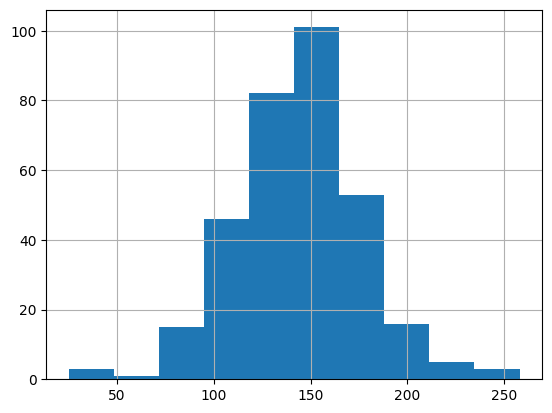

In [ ]:
lens = essays.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

**Number of characters present in each sentence**

<Axes: >

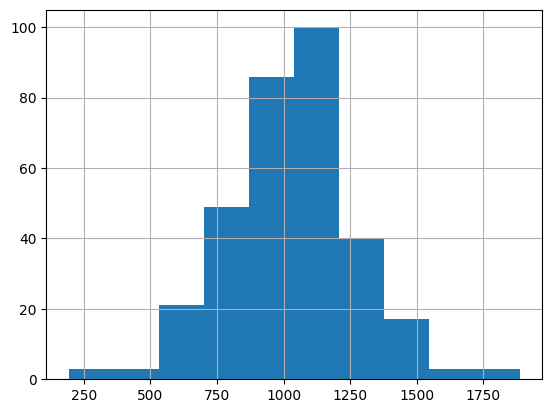

In [ ]:
data3['essay'].str.len().hist()

**Number of words appearing in each sentence**

<Axes: >

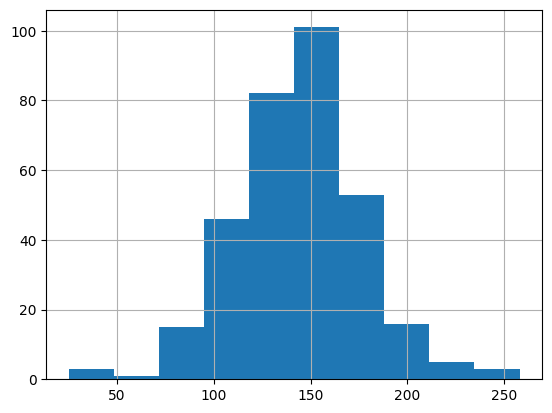

In [ ]:
essays.str.split().map(lambda x: len(x)).hist()

**Average word length in each sentence**

<Axes: >

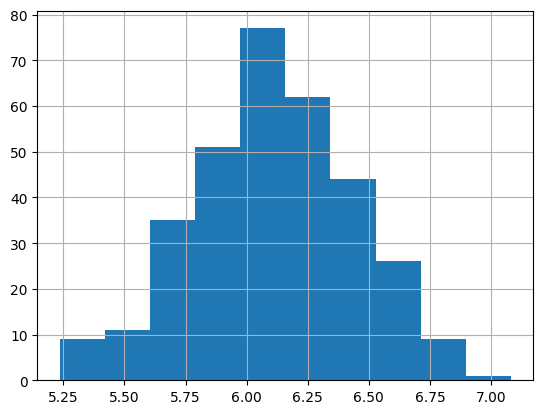

In [ ]:
essays.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# Data Vectorization

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Split the data into features (X) and target (y)
X = data3['essay']
y = data3['evaluator_rating']

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:

# Tokenize and pad sequences
max_words = 100000  # Adjust as needed based on your vocabulary size
max_sequence_length = 1000  # Adjust as needed based on your data
embedding_dim = 200  # Adjust as needed based on your word embeddings

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
print(X_train_pad.shape)
print(X_val_pad.shape)
print(X_test_pad.shape)


(260, 1000)
(52, 1000)
(13, 1000)


In [ ]:
# Reshape your data
X_train = X_train_pad.reshape((X_train.shape[0], 1000, 1))
X_val = X_val_pad.reshape((X_val.shape[0], 1000, 1))
X_test = X_test_pad.reshape((X_test.shape[0], 1000, 1))


In [ ]:
print(X_train.shape)

(260, 1000, 1)


# Model Definition and Training

## Callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval.
filepath="/content/saved_models/weights-epocs:-{epoch:02d}-mae:-{val_mae:.2f}-val_loss:-{val_loss}.h5" #File name includes epoch and validation loss and mae.
#Use Mode = max for accuracy and min for loss.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)


log_csv = CSVLogger('/content/my_logs.csv', separator=',', append=False)
#
callbacks_list = [checkpoint, early_stop, log_csv]

# Multinomial Naive Bayes Classifier

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(260, 1000, 1)
(13, 1000, 1)
(260,)
(13,)


In [ ]:
# Reshape the training and testing data
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Verify the new shapes
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)


(260, 1000)
(13, 1000)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains your floating-point class labels
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
# Now, y_train_encoded contains integer labels corresponding to your original class labels


In [ ]:
### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
# Fit the classifier
classifier.fit(X_train_reshaped, y_train_encoded)

MultinomialNB(alpha=0.1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train contains your floating-point class labels
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit the classifier
classifier.fit(X_train_reshaped, y_train_encoded)

# Make predictions on the test data
y_pred_encoded = classifier.predict(X_test_reshaped)

# Inverse transform to get back the original class labels
y_test_decoded = label_encoder.inverse_transform(y_test_int)
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_decoded, y_pred_decoded)

# Display the MAE
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 1.3076923076923077


# RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

# Define the model
timesteps = X_train.shape[1]  # Adjust if needed based on the structure of your data
features = X_train.shape[2]   # Adjust if needed based on the structure of your data

In [ ]:
print(y_train.shape)

(260,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Reshape y_train and y_test to 2D arrays
y_train_reshaped =  y_train.to_numpy().reshape(-1, 1)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Standardize or scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_reshaped.ravel())
y_test_encoded = label_encoder.transform(y_test_reshaped.ravel())

# Define the model
timesteps = X_train.shape[1]  # 1000
features = X_train.shape[2]    # 1
num_classes = len(np.unique(y_train_encoded))

RNN_model = Sequential()
RNN_model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(timesteps, features)))
RNN_model.add(LSTM(units=64, activation='relu', return_sequences=True))
RNN_model.add(LSTM(units=32, activation='relu'))
RNN_model.add(Dense(units=32, activation='relu'))
RNN_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
RNN_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mae'])

# Train-test split
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)


In [ ]:
# Train the model with validation data
history = RNN_model.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 2.1918 - accuracy: 0.1683 - mae: 5.2922

7/7 [==============================] - 25s 3s/step - loss: 2.1918 - accuracy: 0.1683 - mae: 5.2922 - val_loss: 2.1756 - val_accuracy: 0.2500 - val_mae: 5.3739
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 2.3071 - accuracy: 0.2692 - mae: 5.2922 - val_loss: 2.9725 - val_accuracy: 0.2692 - val_mae: 5.3739
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 2.1511 - accuracy: 0.4038 - mae: 5.2922 - val_loss: 2.1314 - val_accuracy: 0.4808 - val_mae: 5.3739
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 2.1262 - accuracy: 0.5048 - mae: 5.2922 - val_loss: 2.1151 - val_accuracy: 0.5000 - val_mae: 5.3739
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 2.1073 - accuracy: 0.4856 - mae: 5.2922 - val_loss: 2.0885 - val_accuracy: 0.5000 - val_mae: 5.3739
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 2.0734 - accuracy: 0.4856 - mae: 5.2922 - val_loss: 2.0296 - val_accuracy: 0.5000 - val_mae

In [ ]:
# Evaluate the model on the test set
test_metrics = RNN_model.evaluate(X_test_scaled, y_test_encoded, verbose=1)

# Extract the MAE from the test metrics
mae = test_metrics[RNN_model.metrics_names.index('mae')]

print(f'Test MAE: {mae}')


1/1 [==============================] - 1s 813ms/step - loss: 2.0414 - accuracy: 0.4615 - mae: 5.1197
Test MAE: 5.119658470153809


# Bidirectional LSTM model

In [ ]:
import tensorflow as tf
from keras import backend as K
#mean_absolute_percentage_error
def mape(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))
    return K.mean(diff, axis=-1) / 100000.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding

# Define and compile the Bidirectional LSTM model
def get_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(32, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(16, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(8, dropout=0.4, recurrent_dropout=0.4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    model.summary()
    return model

# Create and compile the Bidirectional LSTM model
input_shape = (1000, 1)  # Adjust the input shape to match your data
bidirectional_lstm_model = get_bidirectional_lstm_model(input_shape)


# Create and compile the modified model
#input_shape = (max_sequence_length, 500)
#lstm_model = get_modified_model(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1000, 256)         133120    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1000, 128)         164352    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 1000, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 1000, 32)          10368     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 16)                2

In [ ]:
!mkdir /content/saved_models

Callbacks

In [ ]:
history = bidirectional_lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Adjust the number of epochs
    batch_size=64,  # Adjust batch size as needed
    callbacks=callbacks_list
)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 9.5801 - mae: 3.0177 
Epoch 1: val_mae improved from inf to 2.51924, saving model to /content/saved_models/weights-epocs:-01-mae:-2.52-val_loss:-6.935074806213379.h5
5/5 [==============================] - 232s 40s/step - loss: 9.5801 - mae: 3.0177 - val_loss: 6.9351 - val_mae: 2.5192
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - ETA: 0s - loss: 7.2972 - mae: 2.6153 
Epoch 2: val_mae improved from 2.51924 to 2.00590, saving model to /content/saved_models/weights-epocs:-02-mae:-2.01-val_loss:-4.457880020141602.h5
5/5 [==============================] - 195s 39s/step - loss: 7.2972 - mae: 2.6153 - val_loss: 4.4579 - val_mae: 2.0059
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 4.6792 - mae: 2.0619 
Epoch 3: val_mae improved from 2.00590 to 1.79572, saving model to /content/saved_models/weights-epocs:-03-mae:-1.80-val_loss:-3.783642053604126.h5
5/5 [==============================] - 192s 39s/step - loss: 4.6792 - mae: 2.0619 - val_loss: 3.7836 - val_mae: 1.7957
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 3.0718 - mae: 1.6093 
Epoch 4: val_mae improved from 1.79572 to 1.12912, saving model to /content/saved_models/weights-epocs:-04-mae:-1.13-val_loss:-1.4839428663253784.h5
5/5 [==============================] - 192s 38s/step - loss: 3

New model

val_mae: 0.5775

Old Model

val_mae: 0.6944

# OLD Section

---



In [ ]:
from sklearn.utils import shuffle
#shuffling data
d = shuffle(d)

In [ ]:
#filling null values with space string
d['essay'] = d['essay'].fillna('').apply(str)

In [ ]:
d.isnull().sum()

Unnamed: 0          0
promptId            0
uniqueId            0
essay               0
evaluator_rating    0
dtype: int64

**Data Exploration**

In [ ]:
essays = d['essay']
essays[300]

"Rich and poor small words but great significance. Now a day this two word devided the total world into two section one is rich and anotheris poor. Half of earth's wealth lies in the hand of one percent of its people while a quarter of the population cannot feed itself a day's meal. Rich people are treated the poor as a slave. They create a line between their world and poor world.we think that now there is a gap between rich and poor but this gap is already created by past culture. Incase of previous era there was a king who ruled the total area or state. The people who worked for this king ware treated as slave. Generally the king ruled everyithing but the total work would be completed by this poor men. that time they devided the world bypower, wealth or strength. Now a day the division of world is according to knowledge, money etc. Now a day world faceing a great problem called poverty its come mainly due to this division. There is one percent people who get all things without doing 

**Text Length**

count    1240.000000
mean      274.706452
std        68.846563
min        54.000000
25%       227.000000
50%       289.000000
75%       316.000000
max       590.000000
Name: essay, dtype: float64


<Axes: >

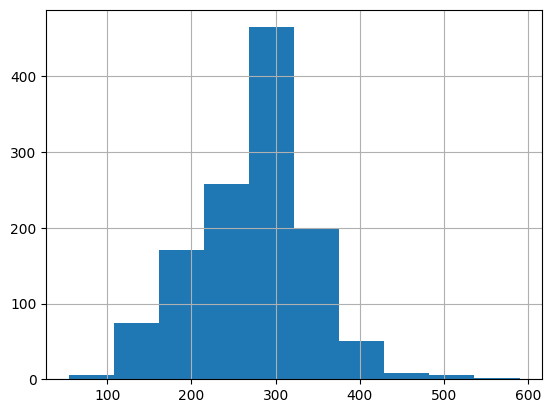

In [ ]:
lens = essays.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

**Number of characters present in each sentence**

<Axes: >

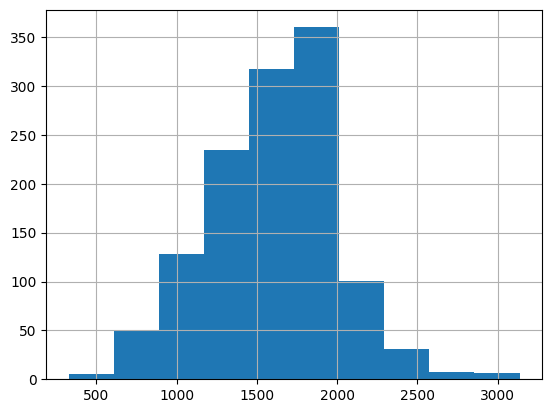

In [ ]:
d['essay'].str.len().hist()

**Number of words appearing in each sentence**

<Axes: >

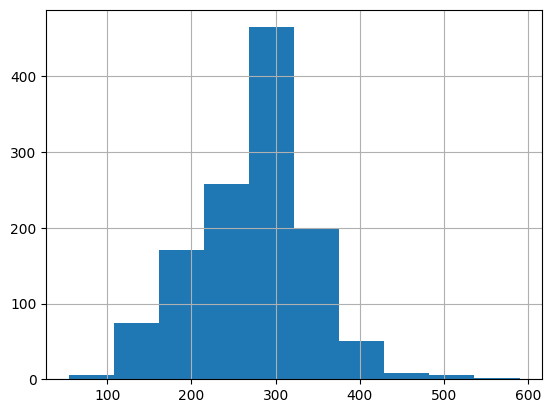

In [ ]:
essays.str.split().map(lambda x: len(x)).hist()

**Average word length in each sentence**

<Axes: >

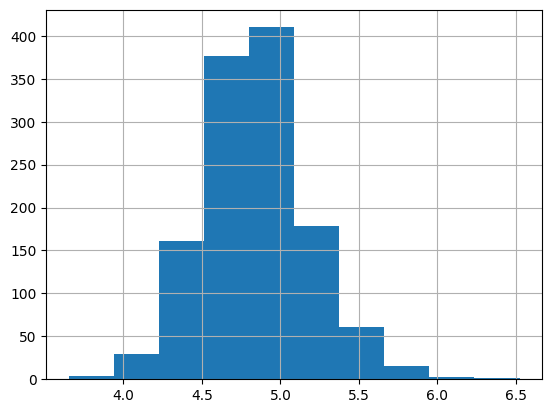

In [ ]:
essays.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

**Features**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus=[]
new= d['essay'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus:
    if word in stop:
        dic[word]+=1

**Words other than stopwords that occur frequently**

<Axes: >

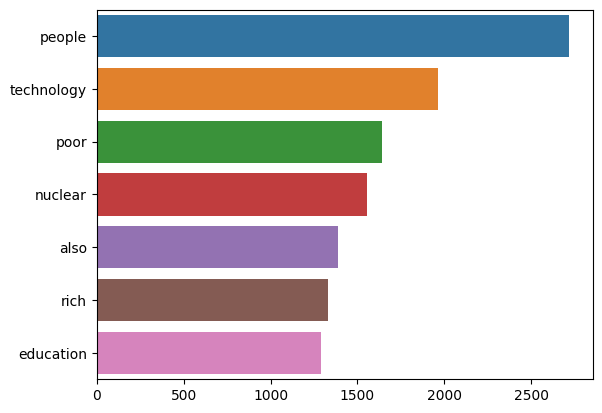

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

**WORDCLOUD**

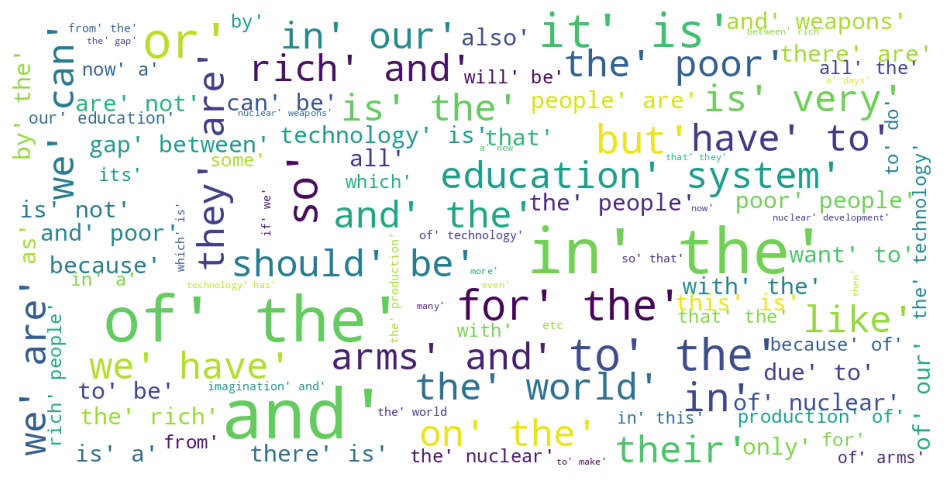

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

In [ ]:
#splitting data into train and validation set
d1 = d[:900]
d2 = d[900:]
x_train = d1.essay
x_val = d2.essay
# keeping promptID to add it later into matrices
prompt_train = d1.promptId
prompt_val = d2.promptId
y_train = d1.evaluator_rating
y_val = d2.evaluator_rating
x_test = t.essay
prompt_test = t.promptId


In [ ]:
type(x_train)

pandas.core.series.Series

In [ ]:
import re
stop_words = set(nltk.corpus.stopwords.words('english'))
def preprocess_sentence(w):
    #changing all character to lowercase
    w = w.lower().strip()
    w = re.sub(r"([?.!,¿])", r" \1 ", (w))
    w = re.sub(r'[" "]+', " ", w)

    #removing extra characters
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()

    #tokenizing data
    word_tokens = word_tokenize(w)
    filter_sent = []

    #removing stopwords
    for word in word_tokens:
        if word not in stop_words:
            filter_sent.append(word)
    return filter_sent

#preproessing essay
x_train = x_train.apply(preprocess_sentence)
x_val = x_val.apply(preprocess_sentence)
x_test = x_test.apply(preprocess_sentence)

In [ ]:
#detokenizing data for tfidf
def detokenize(data):
    detoken = []
    for i in data:
        i = ' '.join([str(elem) for elem in i])
        detoken.append(i)
    return detoken

x_train = detokenize(x_train)
x_val = detokenize(x_val)
x_test = detokenize(x_test)


In [ ]:
#changing training data into list format
#import library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(binary = True)

#changing words into vectors, fit training data in tfidfvectorizer
tf = tfidf.fit(x_train)
x_train = tf.transform(x_train)

# transforming validation and test data
x_val = tf.transform(x_val)
x_test = tf.transform(x_test)

In [ ]:
x_train.shape

(900, 14888)

In [ ]:
# we are getting large feature vector matrices, reduce it using truncateSVD
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(500)
xpca = clf.fit_transform(x_train)

In [ ]:
xpca_val = clf.transform(x_val)
xpca_test = clf.transform(x_test)

In [ ]:
# adding prompt IDs to train, validation and test data
np.append(xpca,prompt_train)
np.append(xpca_val,prompt_val)
np.append(xpca_test,prompt_test)

array([ 0.23758565, -0.10248457, -0.04960921, ...,  5.        ,
        5.        ,  5.        ])

In [ ]:
#reshaping data so that it can fit  into lstm model
xpca = np.reshape(xpca, (xpca.shape[0], 1, xpca.shape[1]))
xpca_val = np.reshape(xpca_val, (xpca_val.shape[0], 1, xpca_val.shape[1]))
xpca_test = np.reshape(xpca_test, (xpca_test.shape[0], 1, xpca_test.shape[1]))

In [ ]:
np.shape(xpca)

(900, 1, 500)

In [ ]:
#LSTM model
def get_model():
    model = Sequential()
    model.add(LSTM(500, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 500], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()
    return model
lstm = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 300)            721200    
                                                                 
 lstm_1 (LSTM)               (None, 64)                93440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________


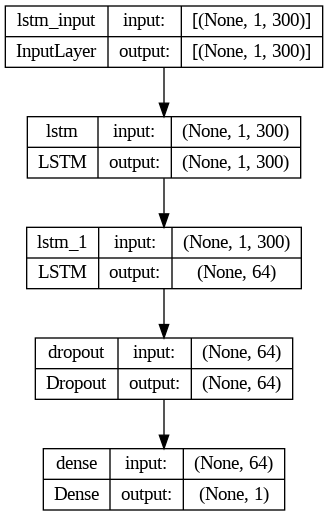

In [ ]:
plot_model(lstm, to_file='model.png', show_shapes=True)

In [ ]:
#training model
result=lstm.fit(xpca, y_train, validation_data = (xpca_val,y_val),batch_size=64, epochs=150)

Epoch 1/150
15/15 [==============================] - 8s 76ms/step - loss: 7.9284 - mae: 2.6103 - val_loss: 6.5191 - val_mae: 2.3762
Epoch 2/150
15/15 [==============================] - 1s 33ms/step - loss: 6.0015 - mae: 2.2725 - val_loss: 4.1958 - val_mae: 1.8916
Epoch 3/150
15/15 [==============================] - 0s 31ms/step - loss: 3.5191 - mae: 1.7125 - val_loss: 2.0074 - val_mae: 1.2627
Epoch 4/150
15/15 [==============================] - 0s 33ms/step - loss: 1.8279 - mae: 1.1631 - val_loss: 1.0256 - val_mae: 0.8139
Epoch 5/150
15/15 [==============================] - 0s 29ms/step - loss: 1.2818 - mae: 0.8989 - val_loss: 0.9274 - val_mae: 0.7190
Epoch 6/150
15/15 [==============================] - 0s 32ms/step - loss: 1.1804 - mae: 0.8323 - val_loss: 0.9431 - val_mae: 0.7520
Epoch 7/150
15/15 [==============================] - 0s 32ms/step - loss: 1.1331 - mae: 0.8339 - val_loss: 0.9137 - val_mae: 0.6963
Epoch 8/150
15/15 [==============================] - 0s 32ms/step - loss: 1.

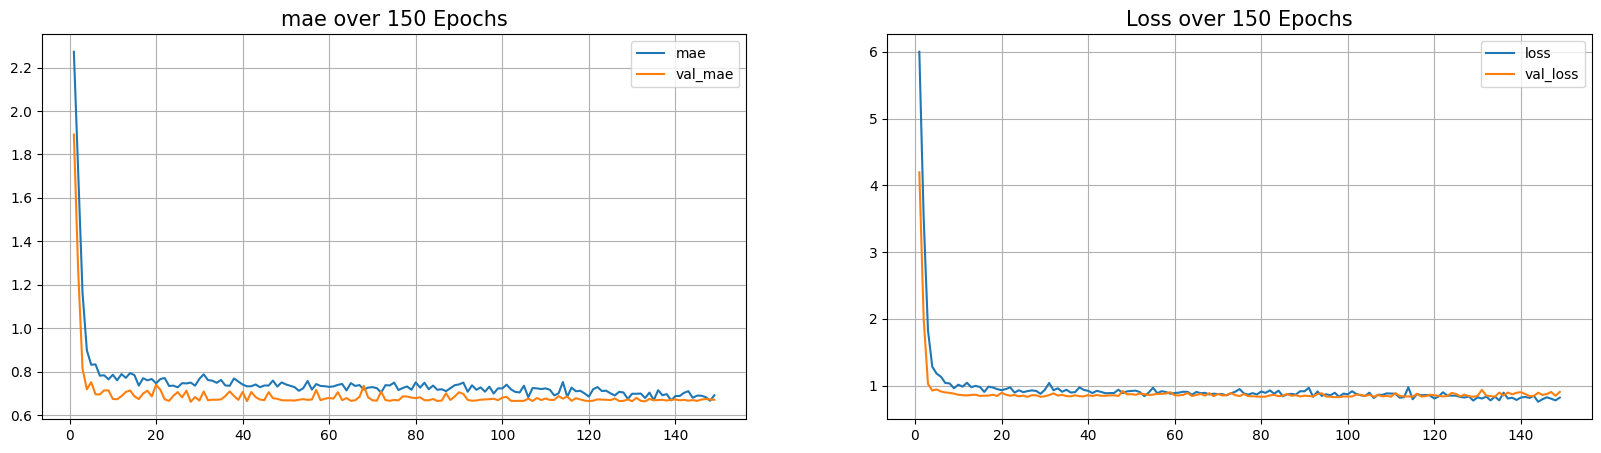

In [ ]:
def plot_mae_loss(result, epochs):
 mae = result.history['mae']
 loss = result.history['loss']
 val_mae = result.history['val_mae']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(20, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), mae[1:], label='mae')
 plt.plot(range(1,epochs), val_mae[1:], label='val_mae')
 plt.title('mae over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='loss')
 plt.plot(range(1,epochs), val_loss[1:], label='val_loss')
 plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
plot_mae_loss(result, 150)

In [ ]:
#predicting values
y_pred = lstm.predict(xpca_test)
y_pred = np.around(y_pred)


10/10 [==============================] - 1s 11ms/step


In [ ]:
t["predicted_score"] =  y_pred

In [ ]:
y_pred

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],

In [ ]:
y_pred = y_pred.flatten()
y_pred

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 4., 3., 3., 3., 4., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [ ]:
t

,Unnamed: 0,promptId,uniqueId,essay,predicted_score
0,0,1,1_315,Curriculum has been adopted in many schools. T...,3.0
1,1,1,1_214,"I strongly agree with the statement , The tig...",3.0
2,2,1,1_196,Imagination and creativity is the most importa...,3.0
3,3,1,1_178,In our eduction system leaves no room for imag...,3.0
4,4,1,1_201,"I will agree at some what extend, because if w...",3.0
...,...,...,...,...,...
300,300,5,5_146,Earth is a creation of God and everything that...,3.0
301,301,5,5_65,production of arms and weapons in this present...,3.0
302,302,5,5_151,Race to become more powerful can destroy the e...,3.0
303,303,5,5_404,In its attempt to harness the power of the ato...,3.0


In [ ]:
lstm.save('final_lstm_v1.h5')
t.to_csv("test_prediction.csv",index = False)

## **Bidirectional LSTM model**

In [ ]:
import tensorflow as tf
from keras import backend as K
#mean_absolute_percentage_error
def mape(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))
    return K.mean(diff, axis=-1) / 100000.0

In [ ]:
from tensorflow.keras.layers import Bidirectional

def get_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(500, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 500], return_sequences=True)))
    model.add(Bidirectional(LSTM(500, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(256, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
    model.add(Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss=tf.keras.losses.Huber(), optimizer='adam', metrics=[mape, 'mae'])
    model.build(input_shape=(None, 1, 500))  # Build the model
    model.summary()
    return model

bilstm = get_model()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_35 (Bidirecti  (None, 1, 1000)          4004000   
 onal)                                                           
                                                                 
 bidirectional_36 (Bidirecti  (None, 1, 1000)          6004000   
 onal)                                                           
                                                                 
 bidirectional_37 (Bidirecti  (None, 1, 512)           2574336   
 onal)                                                           
                                                                 
 bidirectional_38 (Bidirecti  (None, 1, 256)           656384    
 onal)                                                           
                                                                 
 bidirectional_39 (Bidirecti  (None, 128)             

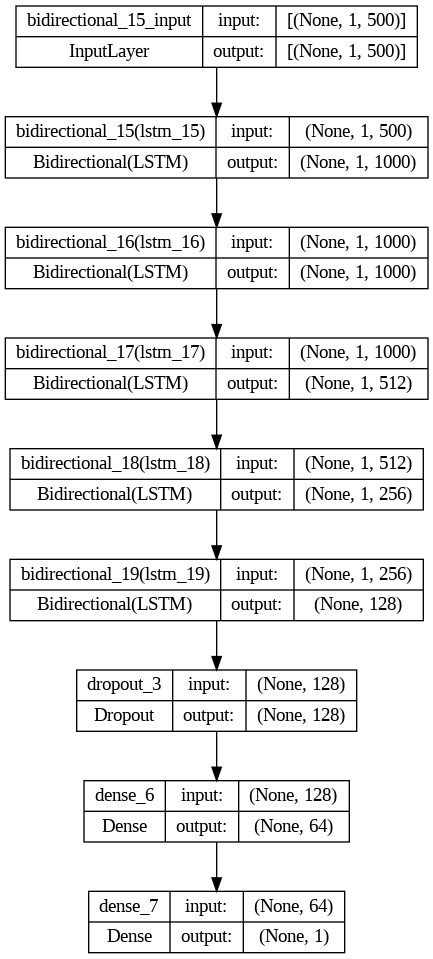

In [ ]:
plot_model(bilstm, to_file='model.png', show_shapes=True)

In [ ]:
!mkdir /content/saved_models

Callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval.
filepath="/content/saved_models/weights-epocs:-{epoch:02d}-mae:-{val_mae:.2f}-val_loss:-{val_loss}.h5" #File name includes epoch and validation loss and mae.
#Use Mode = max for accuracy and min for loss.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)


log_csv = CSVLogger('/content/my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

In [ ]:
#training model 1.1 with new loss optimizer and metrices (loss=tf.keras.losses.Huber(), optimizer='adam', metrics=[mape, 'mae'])
result=bilstm.fit(xpca, y_train, validation_data = (xpca_val,y_val),batch_size=64, epochs=250, callbacks=callbacks_list )

Epoch 1/250
15/15 [==============================] - ETA: 0s - loss: 2.1105 - mape: 87.2032 - mae: 2.5774
Epoch 1: val_mae improved from inf to 2.04386, saving model to /content/saved_models/weights-improvement-01-2.04.h5
15/15 [==============================] - 52s 801ms/step - loss: 2.1105 - mape: 87.2032 - mae: 2.5774 - val_loss: 1.5532 - val_mape: 549.9139 - val_mae: 2.0439
Epoch 2/250
15/15 [==============================] - ETA: 0s - loss: 0.7932 - mape: 1723.7256 - mae: 1.2146
Epoch 2: val_mae improved from 2.04386 to 0.84771, saving model to /content/saved_models/weights-improvement-02-0.85.h5
15/15 [==============================] - 7s 485ms/step - loss: 0.7932 - mape: 1723.7256 - mae: 1.2146 - val_loss: 0.4678 - val_mape: 1707.9647 - val_mae: 0.8477
Epoch 3/250
15/15 [==============================] - ETA: 0s - loss: 0.4515 - mape: 1879.7733 - mae: 0.8123
Epoch 3: val_mae improved from 0.84771 to 0.70414, saving model to /content/saved_models/weights-improvement-03-0.70.h5
15

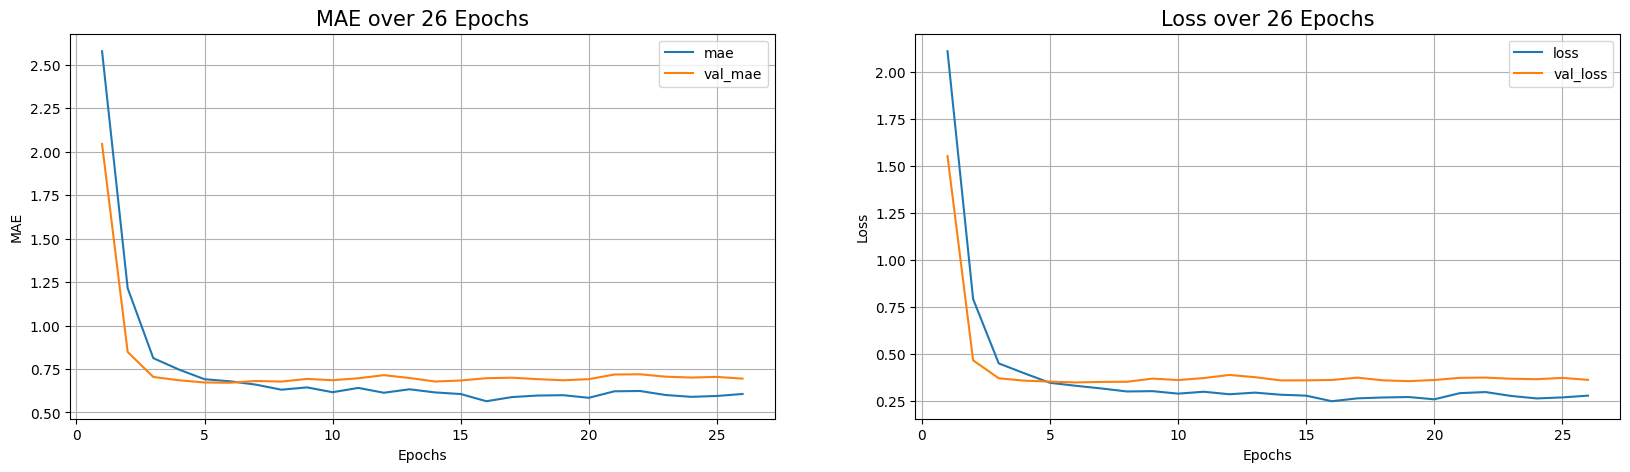


Best metrics Values

Best Mean Absolute Error: 0.6708
Best Val_loss: 0.3503


In [ ]:
def plot_mae_loss(result, num_epochs):
    mae = result.history['mae']
    loss = result.history['loss']
    val_mae = result.history['val_mae']
    val_loss = result.history['val_loss']
    epochs = range(1, num_epochs + 1)

    best_mae = min(val_mae)
    best_loss = min(val_loss)

    plt.figure(figsize=(20, 5))

    plt.subplot(121)
    plt.plot(epochs, mae, label='mae')
    plt.plot(epochs, val_mae, label='val_mae')
    plt.title('MAE over ' + str(num_epochs) + ' Epochs', size=15)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

    plt.subplot(122)
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss over ' + str(num_epochs) + ' Epochs', size=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()
    print("\nBest metrics Values")
    print("\nBest Mean Absolute Error: {:.4f}".format(best_mae))
    print("Best Val_loss: {:.4f}".format(best_loss))

num_epochs = len(result.history['loss'])  # Get the actual number of epochs
plot_mae_loss(result, num_epochs)

In [ ]:
#predicting values
y_pred = bilstm.predict(xpca_test)
y_pred = np.around(y_pred)


10/10 [==============================] - 4s 51ms/step


In [ ]:
t["predicted_score"] =  y_pred

In [ ]:
y_pred

array([[3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],

In [ ]:
y_pred = y_pred.flatten()
y_pred

array([3., 3., 3., 2., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3.,
       3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2.,
       3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3.,
       3., 2., 3., 3., 3., 2., 3., 3., 3., 1., 2., 3., 3., 3., 3., 3., 3.,
       2., 3., 3., 3., 2., 3., 2., 2., 3., 3., 2., 2., 3., 3., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3.,
       3., 2., 3., 3., 2., 2., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [ ]:
t

,Unnamed: 0,promptId,uniqueId,essay,predicted_score
0,0,1,1_315,Curriculum has been adopted in many schools. T...,3.0
1,1,1,1_214,"I strongly agree with the statement , The tig...",3.0
2,2,1,1_196,Imagination and creativity is the most importa...,3.0
3,3,1,1_178,In our eduction system leaves no room for imag...,2.0
4,4,1,1_201,"I will agree at some what extend, because if w...",3.0
...,...,...,...,...,...
300,300,5,5_146,Earth is a creation of God and everything that...,3.0
301,301,5,5_65,production of arms and weapons in this present...,3.0
302,302,5,5_151,Race to become more powerful can destroy the e...,3.0
303,303,5,5_404,In its attempt to harness the power of the ato...,3.0


In [ ]:
bilstm.save('final_bi-lstm_v1.h5')
t.to_csv("test_prediction_bi-lstm.csv",index = False)